# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Data Analysis

In [2]:
df_train = pd.read_csv('problem_2_train.csv')
df_test = pd.read_csv('problem_2_test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(6250, 16)
(2116, 15)


In [4]:
combined = pd.concat([df_train, df_test], ignore_index=True, sort = False)
combined.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5.0
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12.0
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9.0
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9.0
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8.0


In [5]:
len(combined.mobmake.unique())

41

In [6]:
combined.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5.0
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12.0
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9.0
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9.0
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8.0


In [7]:
combined.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days'],
      dtype='object')

# Checking for null values

In [8]:
combined.isnull().sum()

srno                      0
mobmake                   0
hubid                     0
hubpincode                0
pickuppartnerid           0
deliverypartnerid         0
insuranceCompanyId        0
custpincodecategory       0
claimtype                 0
custpincode               0
memcreateddate            0
mobilepurchasedate        0
claimintdate              0
servicecntrid             0
pickupStartdate           0
tat_in_days            2116
dtype: int64

# There are no null values

# Converting string dates to datetime object

In [9]:
combined.mobilepurchasedate = pd.to_datetime(combined.mobilepurchasedate)
combined.claimintdate = pd.to_datetime(combined.claimintdate)
combined.memcreateddate = pd.to_datetime(combined.memcreateddate)
combined.pickupStartdate = pd.to_datetime(combined.pickupStartdate)

# Converting categorical data to numeric values

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
combined.mobmake = le.fit_transform(combined.mobmake)
combined.custpincodecategory = le.fit_transform(combined.custpincodecategory)
combined.claimtype = le.fit_transform(combined.claimtype)

In [11]:
df_train = combined.loc[:6249,:]
df_test = combined.loc[6250:,:]
df_test = df_test.drop(['tat_in_days'], axis = 1)

In [12]:
print(df_train.shape)
print(df_test.shape)

(6250, 16)
(2116, 15)


# Data Visualisation

In [13]:
# Correlation
corr = df_train.corr()

In [14]:
corr

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,servicecntrid,tat_in_days
srno,1.000000,-0.017919,0.277127,-0.026209,0.082192,0.011729,0.039475,-0.048235,-0.002469,-0.011257,0.125644,-0.193610
mobmake,-0.017919,1.000000,-0.145374,-0.061099,0.003724,-0.001000,-0.071553,-0.003258,0.029894,-0.028414,-0.029634,0.154389
hubid,0.277127,-0.145374,1.000000,-0.055715,0.033957,-0.001304,-0.151538,0.059304,-0.003411,-0.022918,0.451190,-0.121613
hubpincode,-0.026209,-0.061099,-0.055715,1.000000,-0.028212,-0.020470,-0.088960,0.074681,0.010315,0.926211,0.201244,-0.001505
pickuppartnerid,0.082192,0.003724,0.033957,-0.028212,1.000000,0.243320,0.088534,-0.093854,-0.032520,-0.053867,0.039964,-0.085485
deliverypartnerid,0.011729,-0.001000,-0.001304,-0.020470,0.243320,1.000000,0.020992,0.007825,-0.063766,-0.029602,0.018962,-0.072986
insuranceCompanyId,0.039475,-0.071553,-0.151538,-0.088960,0.088534,0.020992,1.000000,-0.080530,0.044086,-0.094457,-0.139533,-0.033617
custpincodecategory,-0.048235,-0.003258,0.059304,0.074681,-0.093854,0.007825,-0.080530,1.000000,-0.005847,0.125819,0.056990,0.162138
claimtype,-0.002469,0.029894,-0.003411,0.010315,-0.032520,-0.063766,0.044086,-0.005847,1.000000,0.009147,-0.004271,0.078633
custpincode,-0.011257,-0.028414,-0.022918,0.926211,-0.053867,-0.029602,-0.094457,0.125819,0.009147,1.000000,0.207607,0.048805


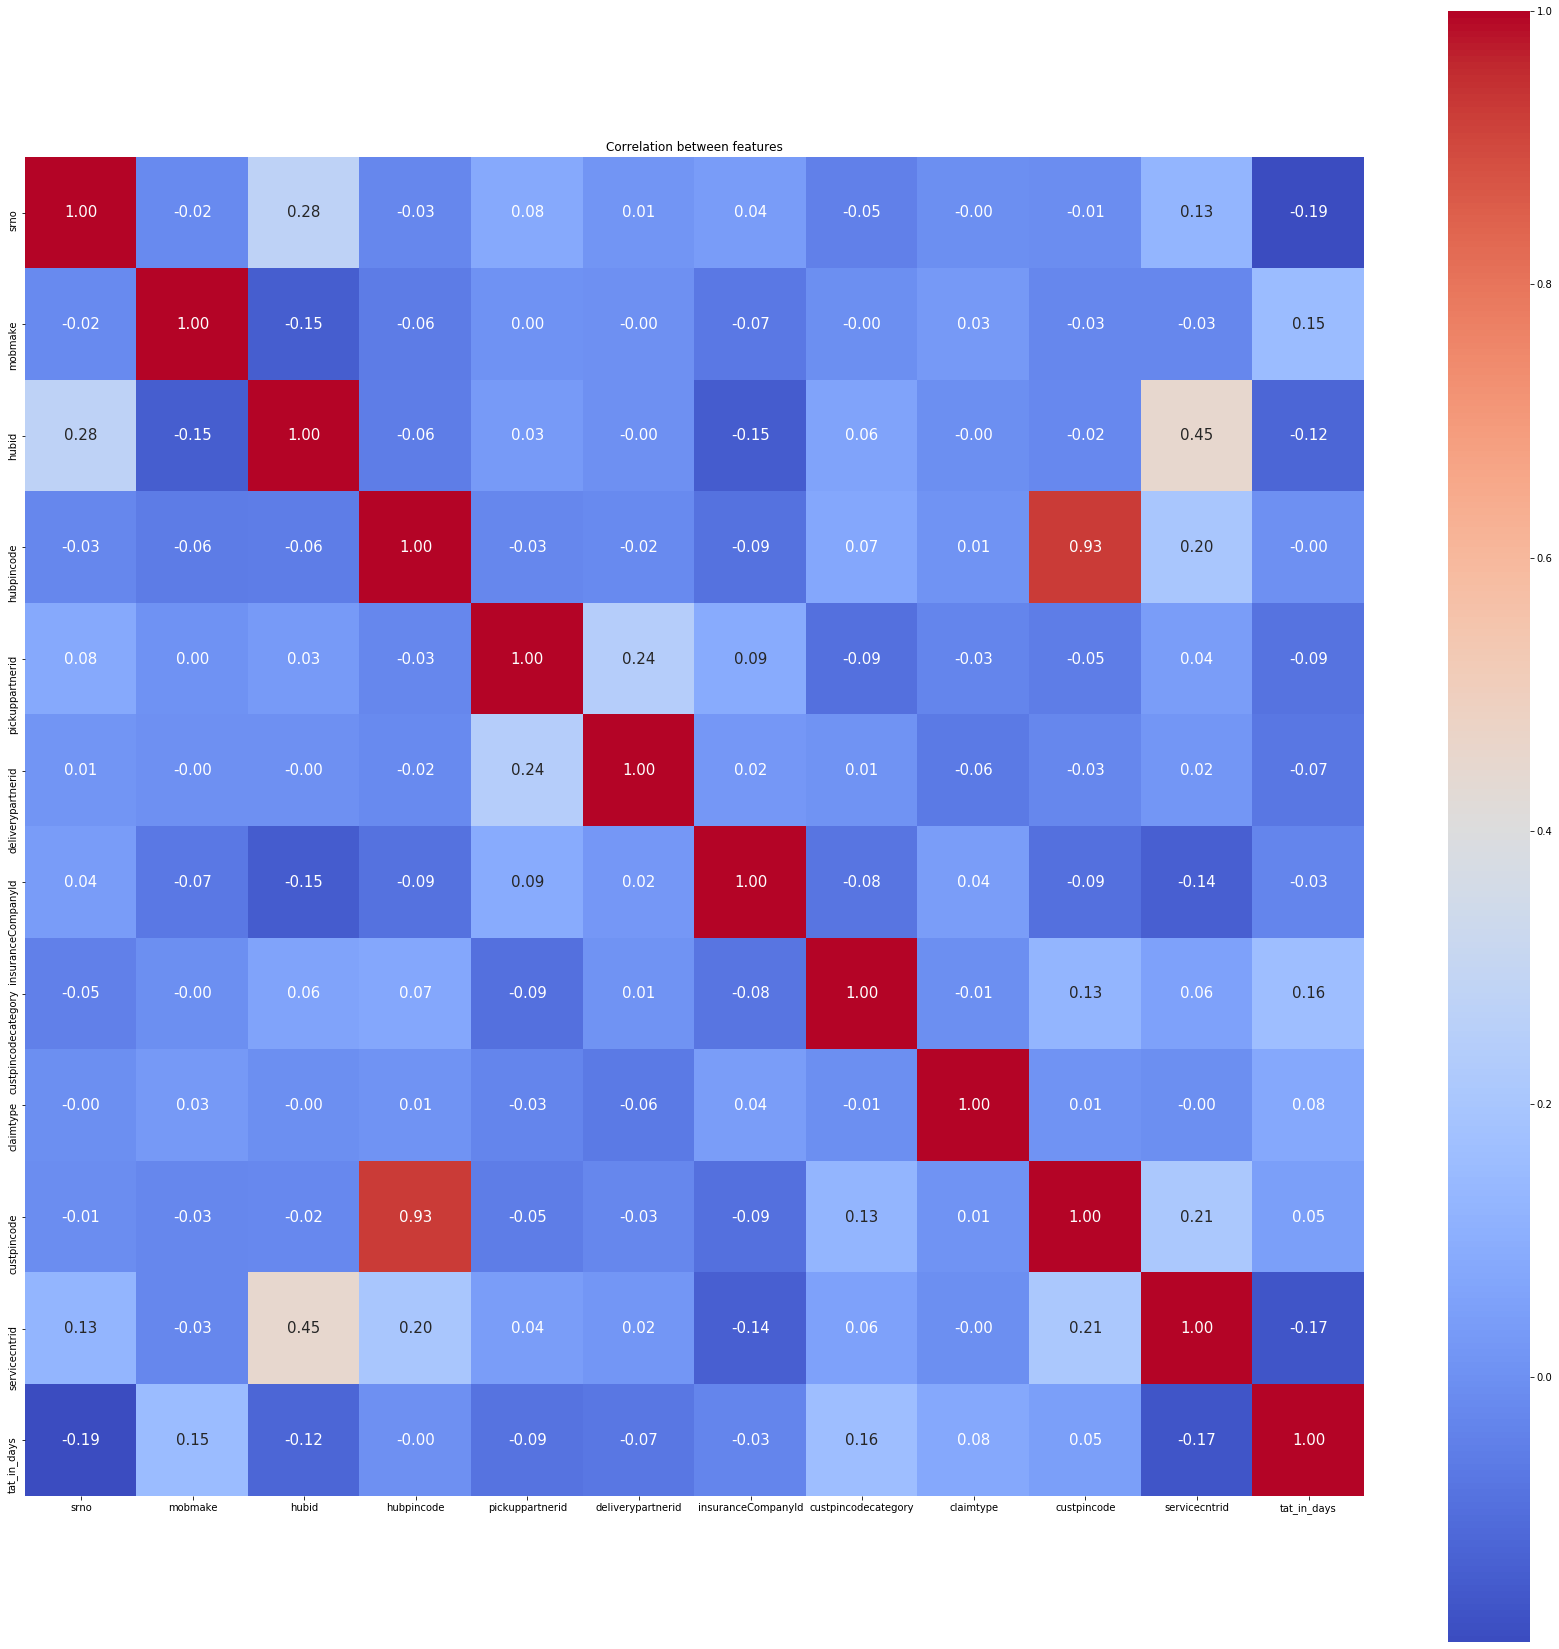

In [15]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

# The hubpincode and custpincode are highly correlated so we can drop one of these, we are dropping hubpincode

# Dropping all the dates columns as there is no relation between the dates

In [16]:
X = df_train.drop(['memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'pickupStartdate', 'hubpincode', 'tat_in_days'], axis = 1)

In [17]:
y = df_train['tat_in_days']

# Machine Learning

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = linreg.predict(X_test)

In [22]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.983350074082462


# Gradient Boost

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
gbreg = GradientBoostingRegressor(n_estimators=500)
gbreg.fit(X_train, y_train)
y_pred = gbreg.predict(X_test)

In [25]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.379622184058951


# Ridge

In [26]:
from sklearn.linear_model import Ridge

In [27]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train) 
y_pred = ridge.predict(X_test)

In [28]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.981494040106572


# Lasso

In [29]:
from sklearn.linear_model import Lasso

In [30]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test)

In [31]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.045860670256878


# KNN

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)

In [34]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.689502742659784


In [35]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso','Gradient Boost','KNN Regressor'],
    'Training RMSE': [ np.sqrt(metrics.mean_squared_error(y_train, linreg.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_train, ridge.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_train, lasso.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_train, gbreg.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_train, neigh.predict(X_train)))],
    'Test RMSE': [ np.sqrt(metrics.mean_squared_error(y_test, linreg.predict(X_test))), np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))), np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))), np.sqrt(metrics.mean_squared_error(y_test, gbreg.predict(X_test))), np.sqrt(metrics.mean_squared_error(y_test, neigh.predict(X_test)))]
    })
models.sort_values(by='Test RMSE')

,Model,Training RMSE,Test RMSE
3,Gradient Boost,3.267231,4.379622
1,Ridge,4.681649,4.981494
0,Linear Regression,4.680631,4.983350
2,Lasso,4.765238,5.045861
4,KNN Regressor,3.088534,5.689503


# Loading the test data

In [36]:
df_test.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
6250,2829088,14,3,560011,233,233,131,1,0,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
6251,2829866,10,2,110018,233,233,228,1,0,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
6252,2894489,10,3,560011,233,233,228,3,0,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
6253,2876708,10,2,110018,233,233,228,2,0,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
6254,2890283,14,22,400104,233,233,131,3,0,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


In [37]:
X_test = df_test.drop(['memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'hubpincode', 'pickupStartdate'], axis = 1)

In [38]:
len(X_test.columns)

10

In [39]:
gbreg = GradientBoostingRegressor(n_estimators=500)
gbreg.fit(X, y)
y_pred = pd.DataFrame(gbreg.predict(X_test))

In [40]:
y_pred.to_csv('test_data_answers.csv', index=False, header=['tat_in_days'])

In [41]:
df_test['tat_in_days'] = y_pred
df_test.to_csv('test_data with answers.csv')